### Joint Photograph Experts Group (.jpg ou .jpeg)

O JPEG incorpora o formato de compressão com perda JPEG, que oferece compressão superior para imagens matriciais. Desde sua introdução em 1992, o JPEG se tornou o formato mais usado no mundo.

* Cores: Até 24-bits;
* Compressão: JPEG;
* Formato numérico: Big-endian;
* Desenvolvedores: C-Cube Microsystems.

#### Estrutura interna

Segue uma tabela com algumas estruturas comuns definidas no JPEG:

<table>
    <tr>
        <th>Nome da estrutura</th>
        <th>Tamanho</th>
        <th>Propósito</th>
    </tr>
    <tr>
        <th>Start of Image (SOI)</th>
        <th>0 byte</th>
        <th>Indica o começo da imagem</th>
    </tr>
    <tr>
        <th>Start of Frame (SOF1 ou SOF2)</th>
        <th>Variável</th>
        <th>Indica que é um JPEG basead em DCT (transformada discreta de cosseno) progressivo ou de linha de base, e contém largura, altura, número de componentes e subamostragem</th>
    </tr>
    <tr>
        <th>Define Huffman Table (DHT)</th>
        <th>Variável</th>
        <th>Especifica uma ou mais tabelas de Huffman</th>
    </tr>
    <tr>
        <th>Define Quantization Table (DQT)</th>
        <th>Variável</th>
        <th>Especifica uma ou mais tabelas de quantização</th>
    </tr>
    <tr>
        <th>Start of Scan (SOS)</th>
        <th>Variável</th>
        <th>Indica um scan de cima para baixo da imagem</th>
    </tr>
    <tr>
        <th>End of Image (EOI)</th>
        <th>0 byte</th>
        <th>Indica o fim da imagem</th>
    </tr>
</table>

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2ycbcr

In [63]:
def convert_colors(img):
    l, c, p = img.shape
    new_image = np.zeros(shape=(l, c, p), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            new_image[i][j][0] = 0.257*img[i][j][0] + 0.505*img[i][j][1] + 0.098*img[i][j][2] + 16
            new_image[i][j][1] = -0.148*img[i][j][0] - 0.291*img[i][j][1] + 0.439*img[i][j][2] + 128
            new_image[i][j][2] = 0.439*img[i][j][0] - 0.368*img[i][j][1] - 0.071*img[i][j][2] + 128

#Y = 0.257*R + 0.505*G + 0.098*B + 16
#Cb = -0.148*R - 0.291*G + 0.439*B + 128
#Cr = 0.439*R - 0.368*G - 0.071*B + 128

    return new_image

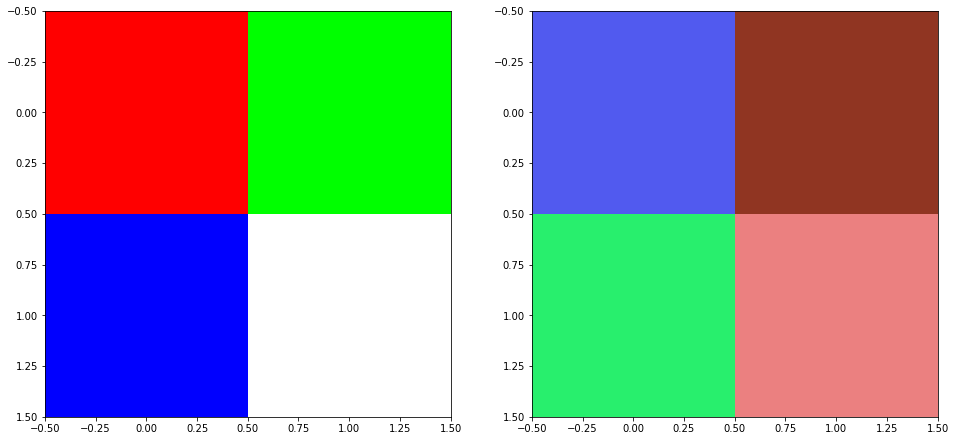

In [60]:
l, c, p = 2, 2, 3
out_img = np.zeros(shape=(l, c, p), dtype=np.uint8)
out_img[0, 0] = 255,   0,   0
out_img[0, 1] =   0, 255,   0
out_img[1, 0] =   0,   0, 255
out_img[1, 1] = 255, 255, 255

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(out_img)

new_img = np.zeros(shape=(l, c, p), dtype=np.uint8)
new_img = convert_colors(out_img)

plt.subplot(1,2,2)
plt.imshow(new_img)

### Referências
- https://archive.org/details/mac_Graphics_File_Formats_Second_Edition_1996/page/n537/mode/2up
- [Como: Codificar e decodificar uma imagem JPEG](https://docs.microsoft.com/pt-br/dotnet/framework/wpf/graphics-multimedia/how-to-encode-and-decode-a-jpeg-image)
- [Compressão sem Perda de Imagens Digitais](http://www.dpi.inpe.br/~carlos/Academicos/Cursos/Pdi/SemPerdas.htm)
- [Transformada Discreta de Cosseno: uma aplicação da Álgebra Linear na compressão de imagens do formato JPEG](https://sites.icmc.usp.br/frasson/jpeg/jpeg.html)
- [Vídeo Heitor](https://www.youtube.com/watch?v=Z3bPUCNPuXU)
- [Chroma Subsampling in NumPy](https://medium.com/@sddkal/chroma-subsampling-in-numpy-47bf2bb5af83)